### Smoking data

In [4]:
library(HSAUR3)

Loading required package: tools


In [10]:
help(smoking)

In [6]:
data("smoking")

A data frame with 26 observations (studies) on the following 4 variables.

`qt`: the number of treated subjetcs who stopped smoking.

`tt`: the total number of treated subjects.

`qc`: the number of subjetcs who stopped smoking without being treated.

`tc`: the total number of subject not being treated.



*The data are in the form of a
2 x 2 table, so we will be analyzing using the odds ratio.*

* Make exploratory boxplots separately for each group as in the smoking help.

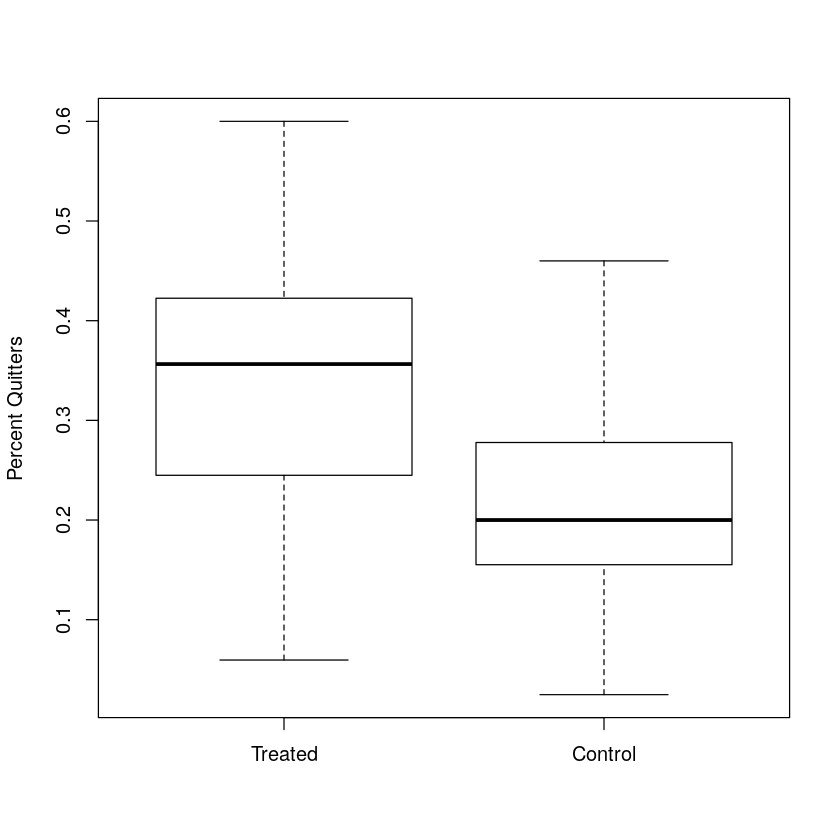

In [11]:
boxplot(smoking$qt/smoking$tt,
      smoking$qc/smoking$tc,
      names = c("Treated", "Control"), ylab = "Percent Quitters")

* The measure of difference (effect size) that we consider here is the odds ratio. We will first calculate this 'by hand' in R. We get the pooled odds ratio (across the studies) as:

In [17]:
odds <- function(x) (x[1] * (x[4] - x[3])) / ((x[2] - x[1]) * x[3])
odds
weight <- function(x) ((x[2] - x[1]) * x[3]) /sum(x)
weight

function(x) (x[1] * (x[4] - x[3])) / ((x[2] - x[1]) * x[3])

function(x) ((x[2] - x[1]) * x[3]) /sum(x)

In [18]:
W <- apply(smoking, 1, weight)
Y <- apply(smoking, 1, odds)
sum(W * Y) / sum(W)

[1] 1.664159

* Try to understand how the 2 functions that you created above (function(x) ... ), and what the W and Y variables are for.

Odds:

(nb. treated who stopped / nb. untreated who stopped) * 

(nb. untreated who didn't stop)/nb. treated who didn't stop)

Weight:

nb. treated who didn't stop * nb. untreated who didn't stop / all

* There is an R package called rmeta, and we can use functions in this package to simplify the analysis. You can look at the results using the summary command on smokingOR.

In [23]:
library(rmeta)

In [24]:
smokingOR <- meta.MH(smoking[["tt"]], smoking[["tc"]], smoking[["qt"]], smoking[["qc"]], names =
rownames(smoking))

In [25]:
summary(smokingOR)

Fixed effects ( Mantel-Haenszel ) meta-analysis
Call: meta.MH(ntrt = smoking[["tt"]], nctrl = smoking[["tc"]], ptrt = smoking[["qt"]], 
    pctrl = smoking[["qc"]], names = rownames(smoking))
------------------------------------
               OR (lower  95% upper)
Blondal89    1.85    0.99       3.46
Campbell91   0.98    0.50       1.92
Fagerstrom82 1.76    0.80       3.89
Fee82        1.53    0.77       3.05
Garcia89     2.95    1.01       8.62
Garvey00     2.49    1.43       4.34
Gross95      2.62    1.03       6.71
Hall85       2.03    0.78       5.29
Hall87       2.82    1.33       5.99
Hall96       0.87    0.46       1.64
Hjalmarson84 2.17    1.10       4.28
Huber88      6.00    2.57      14.01
Jarvis82     3.33    1.37       8.08
Jensen91     1.43    0.84       2.44
Killen84     1.33    0.43       4.15
Killen90     1.23    0.93       1.64
Malcolm80    3.52    0.85      14.54
McGovern92   1.17    0.70       1.94
Nakamura90   3.82    1.15      12.71
Niaura94     1.34    0.35      

* What is the combined estimate of the odds ratio? It should be about the same (rounded) as what you computed above. Is the heterogeneity test significant?

`Mantel-Haenszel OR =1.67 95% CI ( 1.47,1.9 )`: Yes, it's about the same

`Test for heterogeneity: X^2( 25 ) = 34.9 ( p-value 0.09 )`: Not significant at a level of significance of 0.05 -- means that we dont have enough significance to confirm that our data is heterogeneous.

* Make a forest plot using the plot command on smokingOR. What can you conclude from this plot?

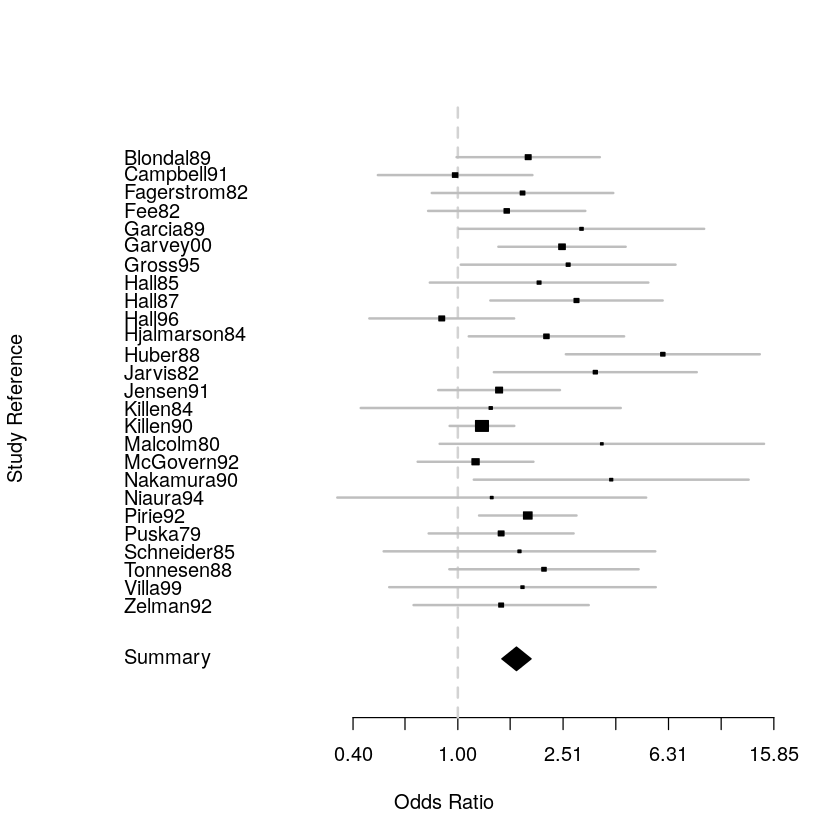

In [28]:
plot(smokingOR)

* If interested, you can get more information on making and customizing forest plots by reading the help for metaplot. Another useful resource is the vignette for the forestplot package.

* We now quantify the evidence from the forest plot by getting an overall estimate of the odds ratio. We have already done a fixed effects meta-analysis; we will now carry out a random effects meta-analysis to compare the results:

In [34]:
smokingDSL <- meta.DSL(smoking[["tt"]], smoking[["tc"]], smoking[["qt"]], smoking[["qc"]], names =
rownames(smoking))

* To get a graphical assessment for the presence of publication bias, you can make a funnel plot:

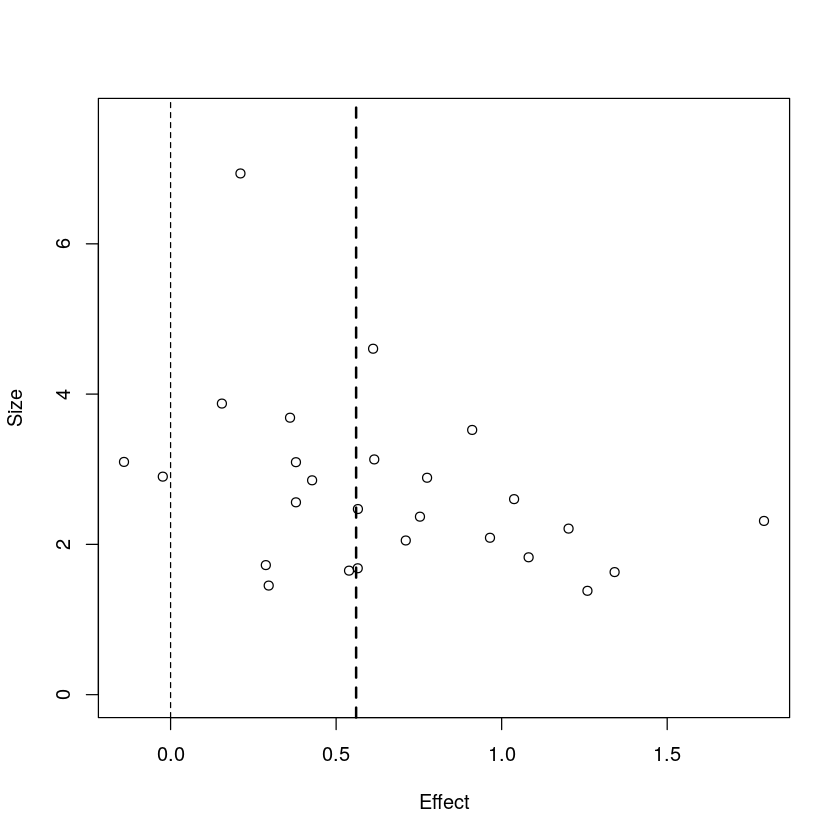

In [38]:
funnelplot(smokingDSL$logs, smokingDSL$selogs, summ = smokingDSL$logDSL, xlim = c(-1.,1.7))
abline(v = 0, lty = 2)

Its biased, we can see that there's a positive effect. There are only two studies with a negative result (odds ratio lower than 1). The funnel should be drawn centered in 0, and we can see that the two lines drawn do not coincide.

In [41]:
# The effect is the odds ratio in log scale
log(6.31)

[1] 1.842136

* Does there appear to be evidence of publication bias?

Yes

* With a little more work, we can apply Fisher's method of p-value combination. The package metap computes a number of different methods for combining p-values. You don't need to read this now, but this tutorial gives a lot of detailed information on the various methods.

In [32]:
library(metap)

In [33]:
arr <- array(unlist(t(smoking)),c(2,2,nrow(smoking))) # put all the tables in a 3-d array
arr # look at the array and compare to original data
smoking.normOR <- smokingOR$logOR/smokingOR$selogOR # standardize log ORs
smoking.logOR.p <- pnorm(smoking.normOR, lower.tail=FALSE) # get one-sided normal p-values
sumlog(smoking.logOR.p) # Fisher combined p

, , 1

     [,1] [,2]
[1,]   37   24
[2,]   92   90

, , 2

     [,1] [,2]
[1,]   21   21
[2,]  107  105

, , 3

     [,1] [,2]
[1,]   30   23
[2,]   50   50

, , 4

     [,1] [,2]
[1,]   23   15
[2,]  180  172

, , 5

     [,1] [,2]
[1,]   21    5
[2,]   68   38

, , 6

     [,1] [,2]
[1,]   75   17
[2,]  405  203

, , 7

     [,1] [,2]
[1,]   37    6
[2,]  131   46

, , 8

     [,1] [,2]
[1,]   18   10
[2,]   41   36

, , 9

     [,1] [,2]
[1,]   30   14
[2,]   71   68

, , 10

     [,1] [,2]
[1,]   24   28
[2,]   98  103

, , 11

     [,1] [,2]
[1,]   31   16
[2,]  106  100

, , 12

     [,1] [,2]
[1,]   31   11
[2,]   54   60

, , 13

     [,1] [,2]
[1,]   22    9
[2,]   58   58

, , 14

     [,1] [,2]
[1,]   90   28
[2,]  211   82

, , 15

     [,1] [,2]
[1,]   16    6
[2,]   44   20

, , 16

     [,1] [,2]
[1,]  129  112
[2,]  600  617

, , 17

     [,1] [,2]
[1,]    6    3
[2,]   73  121

, , 18

     [,1] [,2]
[1,]   51   40
[2,]  146  127

, , 19

     [,1] [,2]
[1,]   13    5
[2,]   30   30

, , 20

     [,1] [,2]
[1,]    5    4
[2,]   84   89

, , 21

     [,1] [,2]
[1,]   75   50
[2,]  206  211

, , 22

     [,1] [,2]
[1,]   29   21
[2,]  116  113

, , 23

     [,1] [,2]
[1,]    9    6
[2,]   30   30

, , 24

     [,1] [,2]
[1,]   23   12
[2,]   60   53

, , 25

     [,1] [,2]
[1,]   11   10
[2,]   21   26

, , 26

     [,1] [,2]
[1,]   23   18
[2,]   58   58

chisq =  172.1813  with df =  52  p =  8.724862e-15 

* What is your overall conclusion here? What evidence is there for the effect of nicotine gum on quitting smoking?

*Very (very) small combined p-value, meaning that it seems to be clear that chewing gum is effective, although it could be a publication bias (it's a bit philosophical).*

## BCG vaccine data

In [42]:
data("BCG")

In [43]:
help(BCG)

* BCGTB: the number of subjects suffering from TB after a BCG vaccination. (qt)

* BCGVacc: the number of subjects with BCG vaccination. (tt)

* NoVaccTB: the number of subjects suffering from TB without BCG vaccination. (qc)

* NoVacc: the total number of subjects without BCG vaccination. (tc)

These data are for a meta-analysis on the efficacy of BCG vaccination against tuberculosis (TB).

Carry out both a fixed effects and
random effects analysis as above. You will need to change the data set smoking to BCG, and the components (tt, etc.) to the
component names for the BCG data - you will have to find these (for examples using names on BCG) The study names are in
BCG$Study.

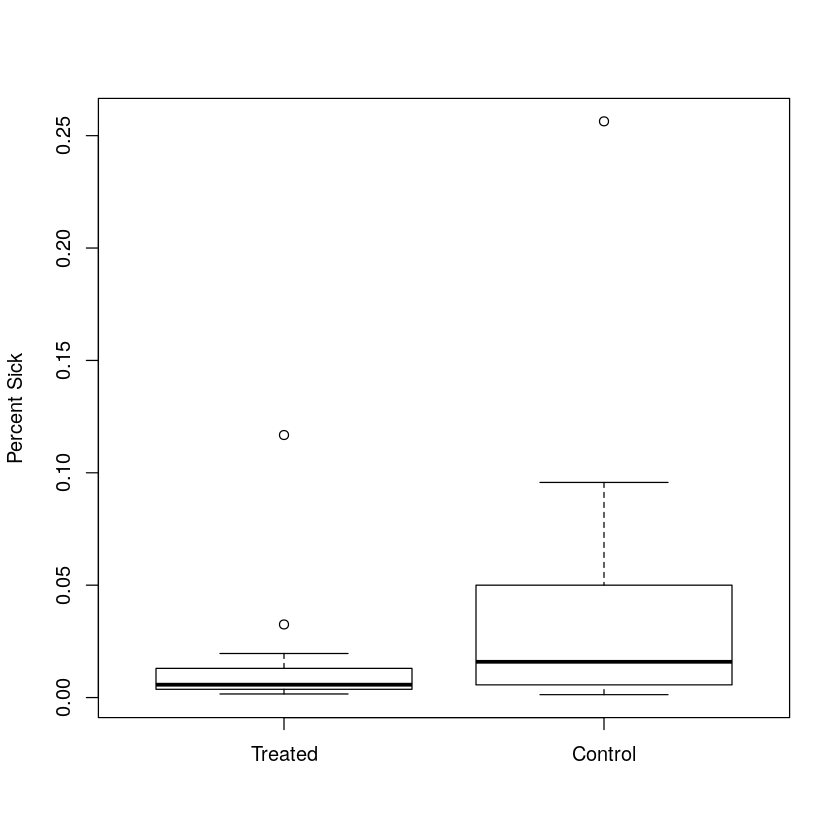

In [44]:
boxplot(BCG$BCGTB/BCG$BCGVacc,
      BCG$NoVaccTB/BCG$NoVacc,
      names = c("Treated", "Control"), ylab = "Percent Sick")

In [53]:
odds <- function(x) (x[1] * (x[4] - x[3])) / ((x[2] - x[1]) * x[3])
odds
weight <- function(x) ((x[2] - x[1]) * x[3]) /sum(x)
weight

function(x) (x[1] * (x[4] - x[3])) / ((x[2] - x[1]) * x[3])

function(x) ((x[2] - x[1]) * x[3]) /sum(x)

In [56]:
reducedBCG = BCG[,c(2,3,4,5)]

In [57]:
W <- apply(reducedBCG, 1, weight)
Y <- apply(reducedBCG, 1, odds)
sum(W * Y) / sum(W)

[1] 0.6325204

In [58]:
BCGOR <- meta.MH(BCG[["BCGVacc"]], BCG[["NoVacc"]], BCG[["BCGTB"]], BCG[["NoVaccTB"]], names =
rownames(BCG))

Find the p-value for the heterogeneity test - you will see that it is very highly
significant. This indicates that we should use the random effects meta-analysis.

In [60]:
summary(BCGOR)

Fixed effects ( Mantel-Haenszel ) meta-analysis
Call: meta.MH(ntrt = BCG[["BCGVacc"]], nctrl = BCG[["NoVacc"]], ptrt = BCG[["BCGTB"]], 
    pctrl = BCG[["NoVaccTB"]], names = rownames(BCG))
------------------------------------
     OR (lower  95% upper)
1  0.39    0.12       1.26
2  0.19    0.08       0.46
3  0.25    0.07       0.91
4  0.23    0.18       0.31
5  0.80    0.51       1.26
6  0.38    0.32       0.47
7  0.20    0.08       0.50
8  1.01    0.89       1.15
9  0.62    0.39       1.00
10 0.25    0.14       0.42
11 0.71    0.57       0.89
12 1.56    0.37       6.55
13 0.98    0.58       1.66
------------------------------------
Mantel-Haenszel OR =0.62 95% CI ( 0.57,0.68 )
Test for heterogeneity: X^2( 12 ) = 163.94 ( p-value 0 )

You can look at the summary and forest plot as above.

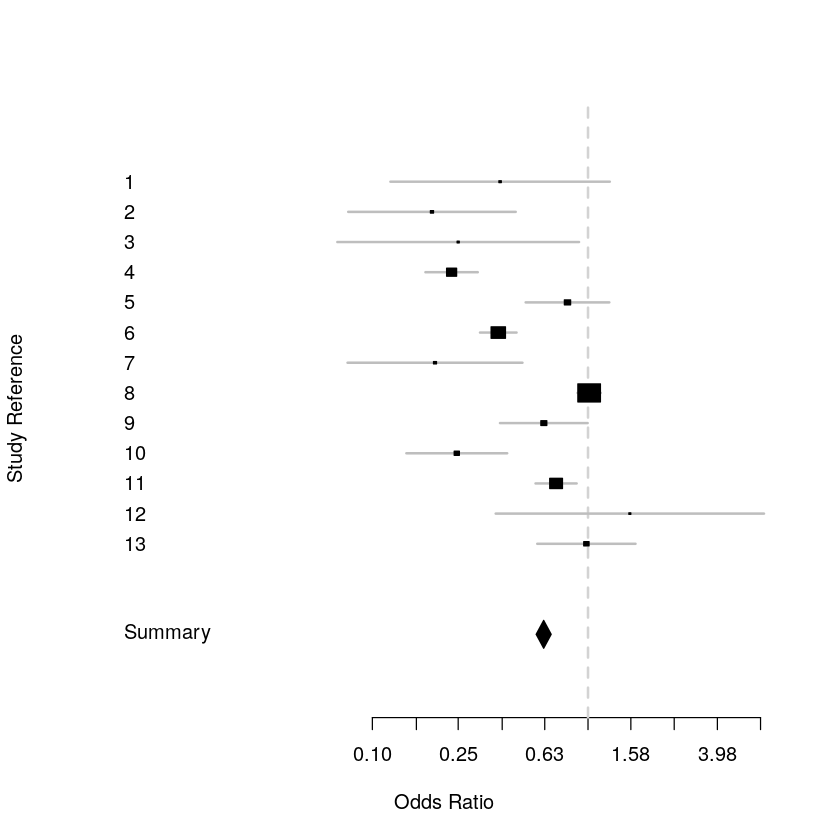

In [61]:
plot(BCGOR)

In [63]:
BCGDSL <- meta.DSL(BCG[["BCGVacc"]], BCG[["NoVacc"]], BCG[["BCGTB"]], BCG[["NoVaccTB"]], names =
rownames(BCG))

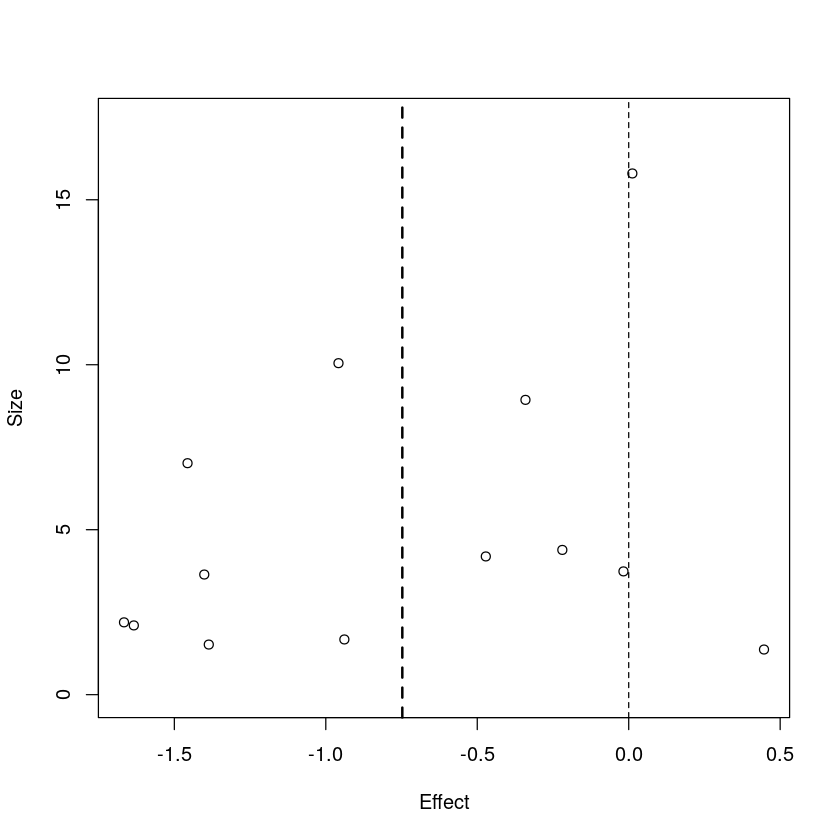

In [64]:
funnelplot(BCGDSL$logs, BCGDSL$selogs, summ = BCGDSL$logDSL, xlim = c(-1.,1.7))
abline(v = 0, lty = 2)

In [70]:
arr <- array(unlist(t(BCG)),c(2,2,nrow(BCG))) # put all the tables in a 3-d array
arr # look at the array and compare to original data
BCG.normOR <- BCGOR$logOR/BCGOR$selogOR # standardize log ORs
BCG.logOR.p <- pnorm(BCG.normOR, lower.tail=FALSE) # get one-sided normal p-values
sumlog(BCG.logOR.p) # Fisher combined p

, , 1

     [,1] [,2]
[1,]    1  123
[2,]    4   11

, , 2

     [,1] [,2]
[1,]  139 1948
[2,]   44    2

, , 3

     [,1] [,2]
[1,]    6   29
[2,]  306  303

, , 4

     [,1] [,2]
[1,]   55    3
[2,] 1949    3

, , 5

     [,1] [,2]
[1,]  231  220
[2,]   11   42

, , 6

     [,1]  [,2]
[1,] 1960    62
[2,]    4 13598

, , 7

      [,1] [,2]
[1,]   248   52
[2,] 12867 1977

, , 8

     [,1] [,2]
[1,]    5 5069
[2,]   33   47

, , 9

     [,1] [,2]
[1,] 5808 1973
[2,]   13    6

, , 10

     [,1] [,2]
[1,]  180  372
[2,] 1541 1451

, , 11

     [,1] [,2]
[1,]   44    7
[2,] 1953    8

, , 12

     [,1] [,2]
[1,] 2545  629
[2,]   10   19

, , 13

     [,1]  [,2]
[1,] 1973   505
[2,]    8 88391

chisq =  6.188234  with df =  26  p =  0.9999779 

If you have looked at the BCG data, you will see that there are additional covariates: Latitude and Year. We will now carry out a
weighted meta-regression of log-odds ratio on these variables.

The weights are the inverse sum of between-study variance and within
study variance. Assuming that you have named your random effects meta-analysis (the result of meta.DSL) BCG.DSL, this is given by:

In [67]:
studyweights <- 1 / (BCGDSL$tau2 + BCGDSL$selogs^2)
y <- BCGDSL$logs
BCG.lm <- lm(y ~ Latitude + Year, data = BCG, weights = studyweights)

Look at the summary of this object.

In [68]:
summary(BCG.lm)


Call:
lm(formula = y ~ Latitude + Year, data = BCG, weights = studyweights)

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-1.66012 -0.36910 -0.02937  0.31565  1.26040 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -16.199115  37.605403  -0.431   0.6758  
Latitude     -0.025808   0.013680  -1.887   0.0886 .
Year          0.008279   0.018972   0.436   0.6718  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7992 on 10 degrees of freedom
Multiple R-squared:  0.4387,	Adjusted R-squared:  0.3265 
F-statistic: 3.909 on 2 and 10 DF,  p-value: 0.05569


You can also make a plot of the estimated log-OR for each variable like you made in the linear
regression lab, e.g.:

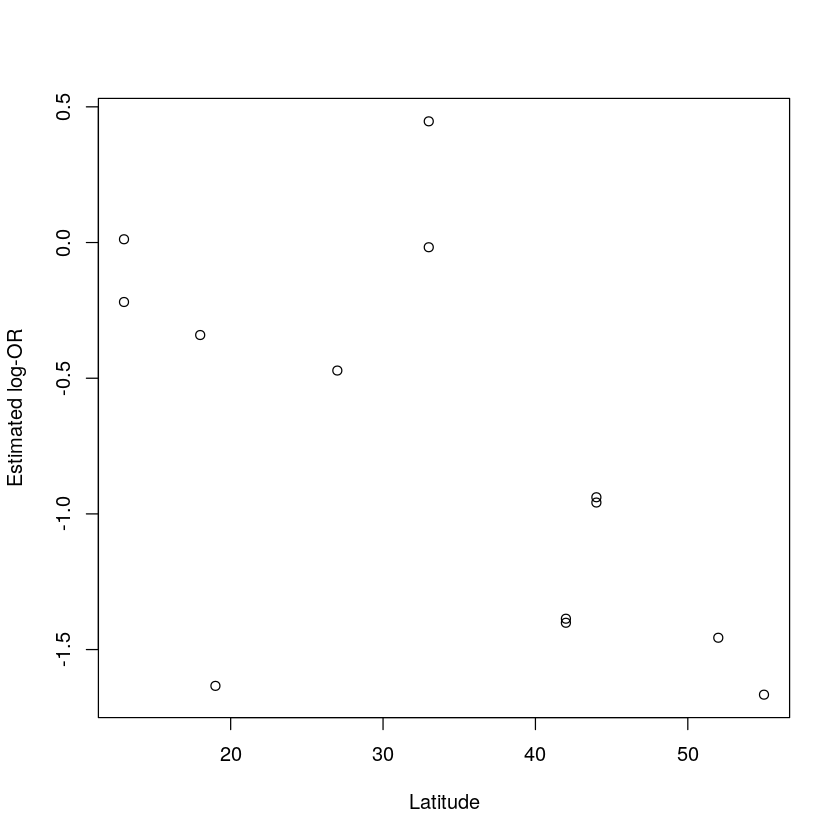

In [69]:
plot(y ~ Latitude, data = BCG, ylab="Estimated log-OR")
abline <- lm(y ~ Latitude, data = BCG, weights = studyweights)

Is there evidence of an effect of either variable on the log-odds ratio?
Since the number of studies is small, we will not make a funnelplot here.

Briefly summarize your results and conclusions. Is the vaccine effect in preventing TB?